# Uvod u pyplot

U današnjem predavanju upoznati ćemo se s osnovnim funkcionalnostima modula `pyplot` koji je dio biblioteke `matplotlib`. To je standardna i najmanje apstrkatna biblioteka ovog tipa u pythonu. Moćnije biblioteke poput `seaborn` su bazirane na pyplotu te ja kao takav idealan za uvod u ovu temu. Nama neće biti potrebna sva funkcionalnost, tako da je ovo predavanje jedan kratki i brzi uvod.

Započnimo s osnovama. Pyplot slika je podijelinja u figure, a figure su podijeljnje u osi (engl. *axis*). Mi ćemo u pravilu imati jednu figuru po slici. Svaka os figure predstavlja jedan koordinatni sustav te na njoj možemo iscrtati više funkcija i točaka. Pokažimo to na primjeru:

In [2]:
from matplotlib import pyplot as plt
import numpy as np

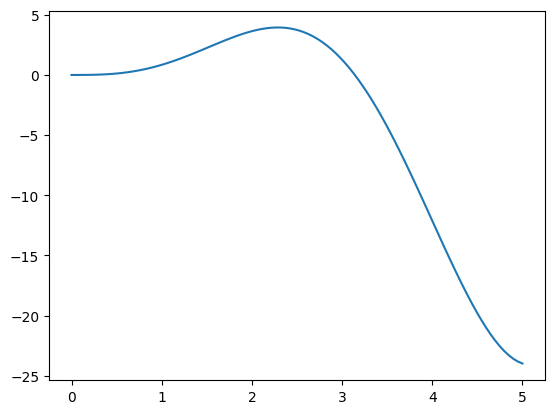

In [3]:
x = np.linspace(0, 5, 100)
y = x ** 2 * np.sin(x)

plt.plot(x,y)
plt.show()

Evo naše funkcije koju smo nacrtali u dvije linije programskog koda. Očito pyplot pretpostavlja mnoge stvari koje nismo specificirali. Naime krenuli smo s idejom da se slika sastoji od figura i osi, koje nigdje nismo specificirali. Pyplot, ako mu drukčije ne zadamo, ima jednu figuru i jednu os. Bilo koji poziv funkcija za iscrtvanje poput `plt.plot()` crta upravo po toj jednoj jedinoj osi.

Dotaknimo se linije `np.linspace(0,5,100)`. Ovo će nam vratiti numpy array duljine 100, a elementi će se uniformno protezati od 0 do 1. Formalnije, stvaramo array uniformno razamknutih brojeva na intervalu. `plt.plot(x,y)` će prvo spariti elemente od `x` i `y` na istim pozicijama u točke. Te će točke zatim nacrtati te će ih povezati ravnim linijama redoslijedom kojim ih je crtao. Što imamo više točaka funkcija će biti glađa.

Pogledajmo:

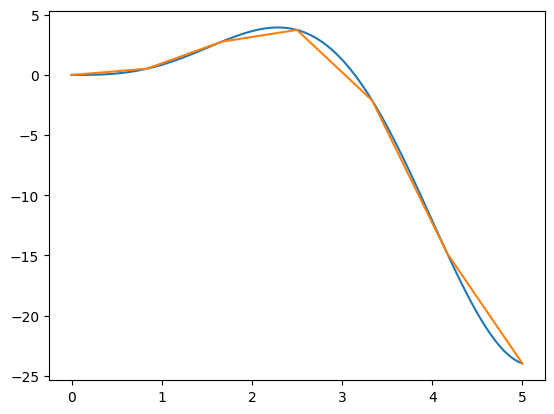

In [4]:
x = np.linspace(0, 5, 100)
y = x ** 2 * np.sin(x)

x_jagged = np.linspace(0,5,7)
y_jagged = x_jagged ** 2 * np.sin(x_jagged)

plt.plot(x,y)
plt.plot(x_jagged,y_jagged)
plt.show()

Što se dogodilo? Svaki poziv funkcije `plot` iscrtava zasebnu krivulju. Možemo primjetiti da se krivulje razlikuju u bojama. Naime pyplot interno pamti koliko je krivulja iscrtao na danoj osi, te svakoj sljedećoj pridružuje novu boju, ako to drukčije ne specificiramo. Također brojevi na osima se prilagođavaju ekstremima, osim ako ne zadamo drukčije.

Ovaj graf je prilično neinformativan. Nema oznake na osima, ne znamo koja krivulja prikazuje što i slično.

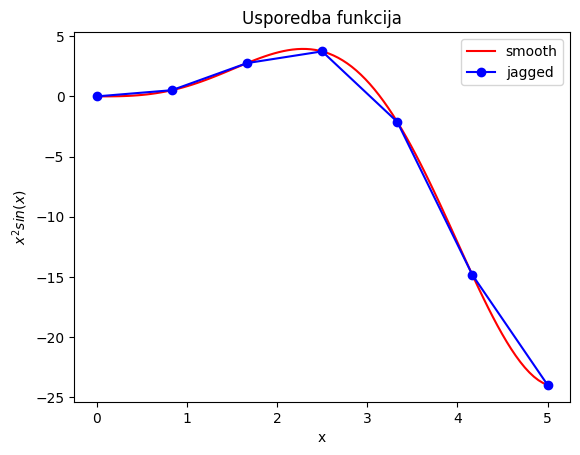

In [5]:
x = np.linspace(0, 5, 100)
y = x ** 2 * np.sin(x)

x_jagged = np.linspace(0,5,7)
y_jagged = x_jagged ** 2 * np.sin(x_jagged)

plt.plot(x,y, label='smooth', color='red')
plt.plot(x_jagged,y_jagged, label='jagged', color='blue', marker='o')

plt.xlabel('x')
plt.ylabel('$x^2 sin(x)$')
plt.title('Usporedba funkcija')
plt.legend()
plt.show()

U par koraka smo stvorili profesionalan graf. Pa pogledajmo pobliže što smo sve promijenili. Prilikom iscrtavanja krivulje dodali smo opcionalni argument `label`, on naime krivulji pridružuje ime koje će se prikazati u legendi pozivom funkcije `plt.legend()`. Zatim smo postavili proizvoljnu boju krivulje pomoću opcionalnog argumenta `color`. Za drugu krivulju smo specificirali opcioanaln argument `marker` kojem možemo predati jedan od podržanih markera poput `x, o, ^`. `plot` će za svaku predanu točku iscrtati i marker povrh same linije. 
Pomoću funkcija `xlabel` i `ylabel` dodajemo oznake na osi grafa, a funkcija `title` dodaje naslov.

Probjamo sada nacrtati dvije osi

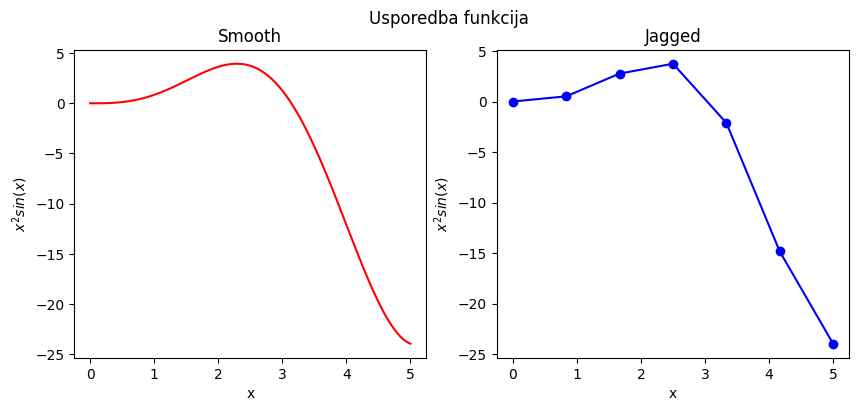

In [6]:
fig = plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)

plt.plot(x,y, label='smooth', color='red')

plt.xlabel('x')
plt.ylabel('$x^2 sin(x)$')
plt.title('Smooth')

plt.subplot(1,2,2)

plt.plot(x_jagged,y_jagged, label='jagged', color='blue', marker='o')


plt.xlabel('x')
plt.ylabel('$x^2 sin(x)$')
plt.title('Jagged')

fig.suptitle('Usporedba funkcija')


plt.show()



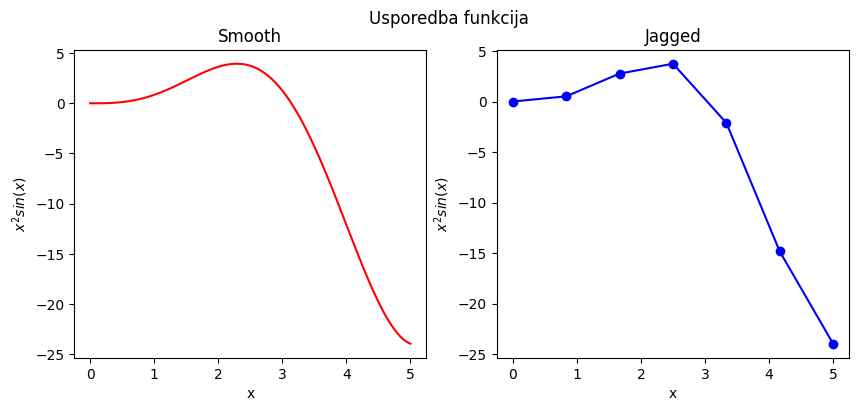

In [7]:
fig, axes = plt.subplots(1,2)

fig.set_size_inches(10, 4)


ax = axes[0]
ax.plot(x,y, label='smooth', color='red')

ax.set_xlabel('x')
ax.set_ylabel('$x^2 sin(x)$')
ax.set_title('Smooth')

ax = axes[1]

ax.plot(x_jagged,y_jagged, label='jagged', color='blue', marker='o')


ax.set_xlabel('x')
ax.set_ylabel('$x^2 sin(x)$')
ax.set_title('Jagged')

fig.suptitle('Usporedba funkcija')


plt.show()



U pyplotu postoje dva načina za stvarnje novih osi. Prvi prikazani je pomoću naredbe `plt.subplot`. Ta naredba kao argument prima tri broja, broj redaka, broj stupac, te indeks osi (koji počinje od jedan). Nakon tog poziva pyplot iscrtava samo po specificiranoj osi do ponovnog poziva te funkcija. Ovo je stariji pristup, te je danas uobičajnije koristiti `plt.subplots`. Ta funkcija vraća tuple, gdje je prvi element figura, a drugi element lista osi. Prvi argument te funkcije je broj redaka, a drugi broj stupaca.

Idemo sada napraviti 3 osi, dvije u prvom retku i jedna u drugom.


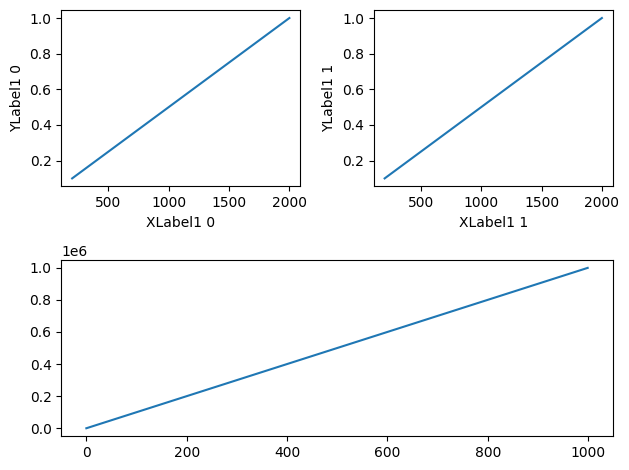

In [8]:


import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ax = fig.add_subplot(gs[1, :])
ax.plot(np.arange(0, 1e6, 1000))



for i in range(2):
    ax = fig.add_subplot(gs[0, i])
    ax.plot(np.arange(1., 0., -0.1) * 2000., np.arange(1., 0., -0.1))
    ax.set_ylabel('YLabel1 %d' % i)
    ax.set_xlabel('XLabel1 %d' % i)

fig.align_labels()  # same as fig.align_xlabels(); fig.align_ylabels()

plt.show()

Ovo je primjer preuzet sa službene pyplot stranice. Pomoću modula `gridspec` stvaramo rešetkastu strukturu u figuri. Zatim svaku os dodajemo pomoću metode `add_subplot`. Argument metode `add_subplot` su ćelije rešetkaste strukture preko kojih će se os protezati. 

Konkretno za širu os specificiramo da se proteže ćelijama `gs[1, :]`, to jest biramo drugi redak i sve stupce u drugom retku

Idemo sada nacrtati kombinacije točaka i krivulja, što će biti čest obrazac u strojnom učenju. Naime krivulja će predstavljati distribuciju koja generira podatke to jest oznake, a sami podatci će zbog šuma ležati malo iznad ili ispod krivulje

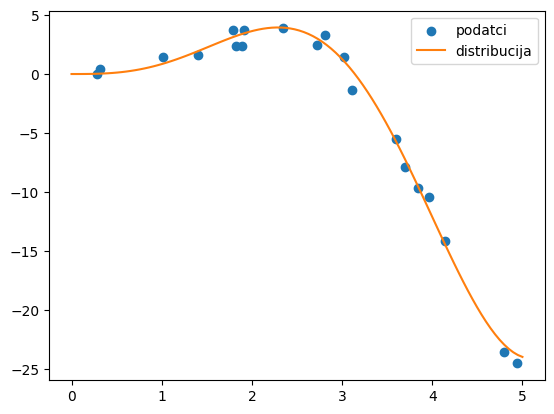

In [9]:
n = 20
x = np.random.uniform(0,5,n)
y = x**2 * np.sin(x) + np.random.normal(0, 1, n)

ls = np.linspace(0,5,100)
ls_y = ls**2 * np.sin(ls)

plt.scatter(x,y, label='podatci')
plt.plot(ls, ls_y, label='distribucija', color=u'#ff7f0e') #originalna narančasta boja za drugu krivulju

plt.legend()
plt.show()

Za iscrtavanje točaka koristili smo naredbu `plt.scatter`, koja se ponaša jako slično naredbi `plt.plot` osim što ne povezuje nacrtane točke. Ostale mogućnosti funkcije su vrlo slične, primjerice možemo zadavati labele, mijenjati boje i slično,

Pogledajmo jednu napredniju mogućnost bojanja točaka.

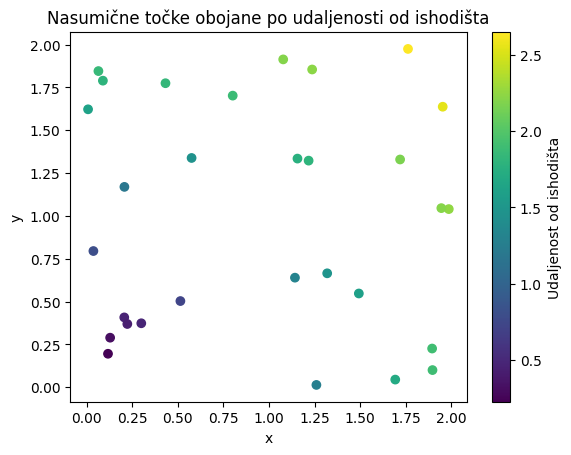

In [10]:


n = 30

x = np.random.uniform(0, 2, n)
y = np.random.uniform(0, 2, n)

distances = np.sqrt(x**2 + y**2)

colormap = plt.cm.viridis

plt.scatter(x, y, c=distances, cmap=colormap)
plt.colorbar(label='Udaljenost od ishodišta')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Nasumične točke obojane po udaljenosti od ishodišta')
plt.show()


Kako ovo radi? Za početak primjetite argument `c`. To je generalizacija argumenta `color`. Za razliku od samo boje, `c` može biti array vrijednosti. Te se vrijednosti zatim normaliziraju, te se temeljem njih specificira boja iz spektra boja definiranih argumentom `cmap`. Metoda `plt.colorbar` prikazuje odnos boja i vrijednosti predanih kao argument `c`.

Pošto strojno učenje često ima dodira sa statistikom, demonstrirati ćemo kako iscrtati histogram. Da se podsjetimo histogram je diskretan prikaz slučajne varijable. U slučaju diskretnih varijabli, svaki stupac histograma odgovara jednoj ili više realizacija. Primjerice kada bacamo kocku stupci mogu odgovarati realizacijama `[1,2,3,4,5,6]` ili pak realizacijama `[(1,2), (3,4), (5,6)]`. U pravilu, ako realizacija nema puno svaki stupac odgovara jednoj relaizaciji. U slučaju kontinuirane varijable, onda u svaki stupac stavljamo elemente iz nekog raspona. Primjerice u slučaju visina ljudi mogli bi smo napravati histograme da stupac odgovara rasponu od 5 centimetara. Pogledajmo primjer

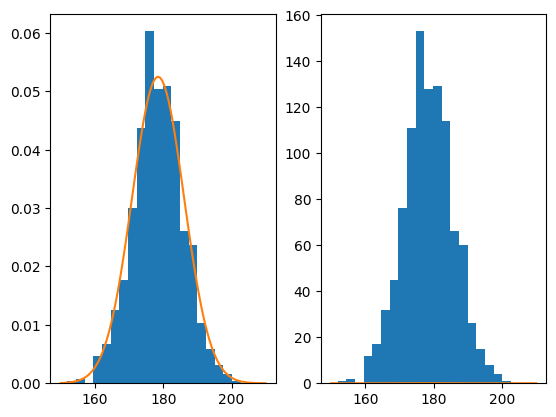

In [11]:
from scipy.stats import norm
n = 1000
height = np.random.normal(178.5, 7.6, n)

plt.subplot(1,2,1)

ls = np.linspace(150, 210, 100)
ys = norm.pdf(ls, 178.5, 7.6)
plt.hist(height, bins=20, density=True)
plt.plot(ls,ys)

plt.subplot(1,2,2)


plt.hist(height, bins=20)
plt.plot(ls,ys)
plt.show()

Naredba `plt.hist` iscrtava histogram distribucije. Argument `bin` specificira broj jednako širokih stupaca. Argument `denisty`, skalira stupce histograma oduzimjaući srednju vrijednost i dijeljenjm s korijenom standardne devijacije. To jest pretvara distribuciju u normalnu.

Nekada želimo vizualizirati funkcije dviju varijabli. Naime da bi smo to efikasno postigli potreban nam je trodimenzionalni prikaz. Pyplot nam omgućava lagano iscrtavanje trodimenzionalnih objekta. Pogledajmo primjer.

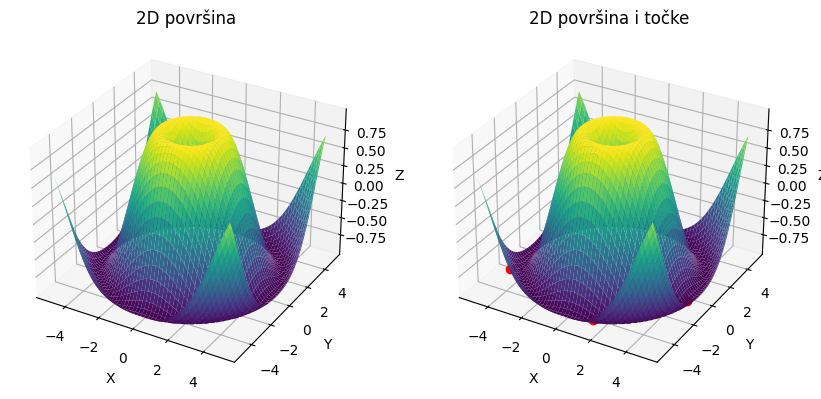

In [47]:

# Generate data for the surface
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2)) 

# Plot the surface
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('2D površina')

ax = fig.add_subplot(122, projection='3d', computed_zorder=False)
ax.set_axisbelow(True)


xp = np.random.uniform(-5, 5, 10)
yp = np.random.uniform(-5, 5, 10)
zp = np.sin(np.sqrt(xp**2 + yp**2)) 

ax.plot(xp,yp,zp, c='red', linestyle=' ', marker='o', zorder=1.1) # scatter uvijek iscrta točke "iza" površine
ax.plot_surface(x, y, z, cmap='viridis', zorder=1.2)              # zorder atribut se koristi samo kad je computed zorder=False



# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('2D površina i točke')

plt.show()


Za kraj, znatiželje upućujem na ovaj lijepi [uvod](https://matplotlib.org/stable/users/explain/quick_start.html)